In [1]:
!pip install numpy --quiet
!pip install tensorflow --quiet
!pip install pandas --quiet
!pip install keras --quiet

# Нейросети над MNIST
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Нам нужно распознать рукописные цифры по их изображениям. Так как цифр 10, то в нашей задаче классификации 10 классов.

Наш набор данных MNIST часто используется для демонстрации возможностей различных алгоритмов машинного и глубинного обучения, так как для него достаточно просто добиться хорошей точности работы.

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(f" Всего {X_train.shape[0]} изображений в обучающей выборке и {X_test.shape[0]} в тестовой.")

 Всего 60000 изображений в обучающей выборке и 10000 в тестовой.


In [5]:
X_train = X_train / 255
X_test = X_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

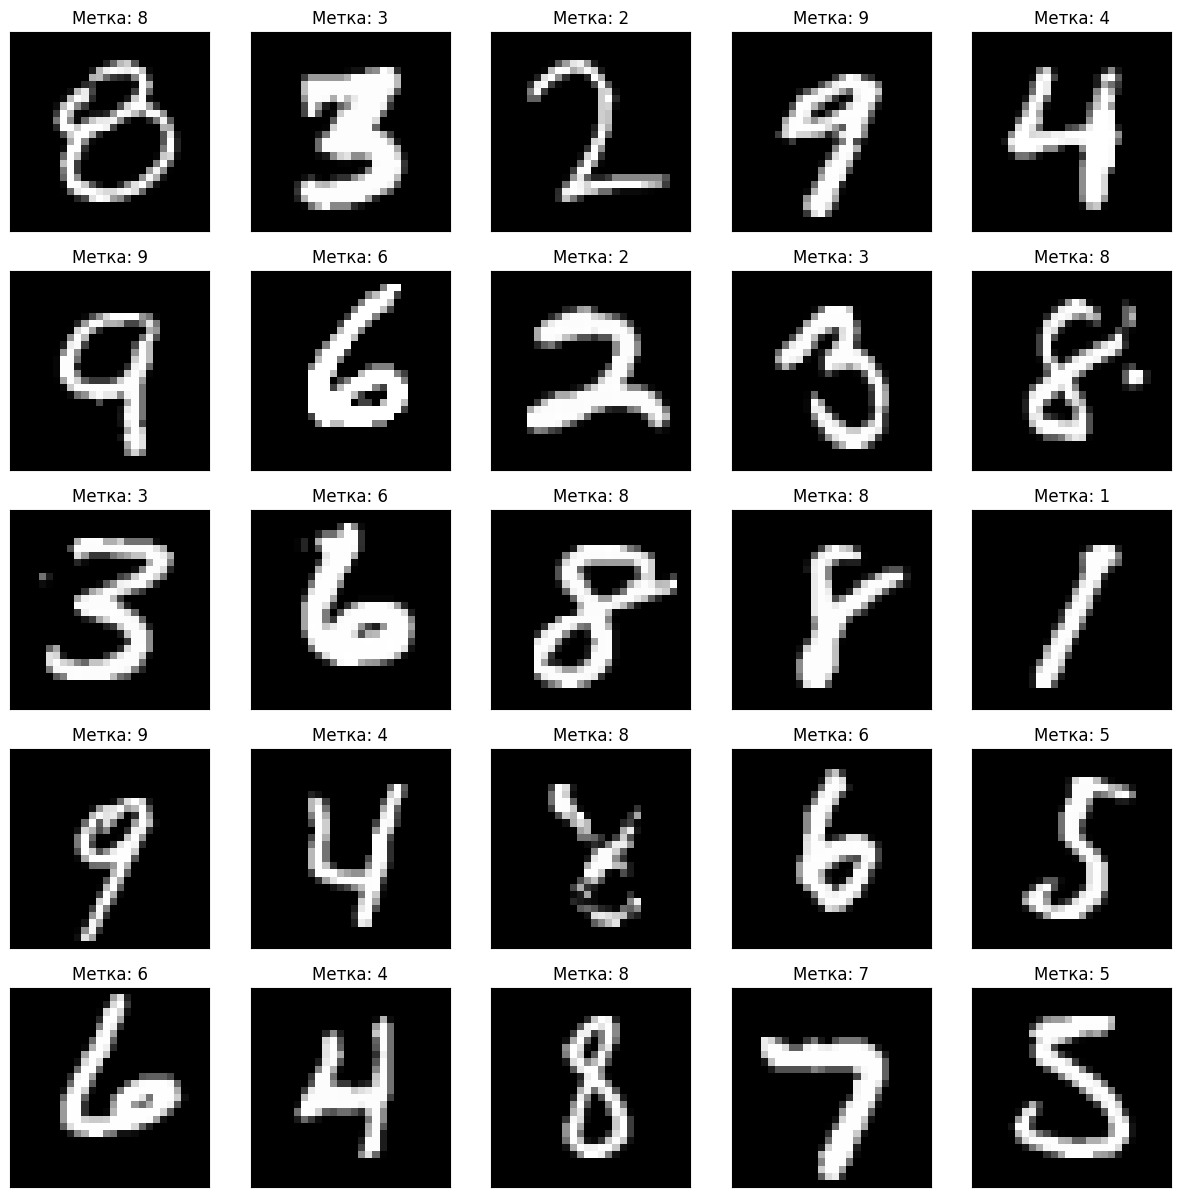

In [6]:
# Helper functions for images.

def show_img(img, ax=None, title=None):
    """Shows a single image."""
    if ax is None:
        ax = plt.gca()
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    if title:
        ax.set_title(title)

def show_img_grid(imgs, titles):
    """Shows a grid of images."""
    n = int(np.ceil(len(imgs)**.5))
    _, axs = plt.subplots(n, n, figsize=(3 * n, 3 * n))
    for i, (img, title) in enumerate(zip(imgs, titles)):
        show_img(img, axs[i // n][i % n], title)

def show_examples(data, label, predicted = None):
    idxs = np.random.randint(0, len(data), 25)
    if np.array(label).max() <= 1:
        label = np.argmax(label, axis=-1)

    if predicted is not None:
        if np.array(predicted).max() <= 1:
            predicted = np.argmax(predicted, axis=-1)
    show_img_grid(
    [data[idx] for idx in idxs],
    [f'Метка: {label[idx]}' if predicted is None else f'Метка: {label[idx]}. Предсказание: {predicted[idx]}' for idx in idxs],
    )

show_examples(X_test, y_test)

In [7]:
input_size = X_train[0].shape
print(f" Размер изображения {input_size} пикселей")
print(f" Значения всех пикселей лежат в диапазоне от {X_train.min()} до {X_train.max()}")
print(f" Метка класса первой картинки в исходном формате {np.argmax(y_train[0])}")
print(f" Метка класса первой картинки в one-hot формате {y_train[0]}")

 Размер изображения (28, 28) пикселей
 Значения всех пикселей лежат в диапазоне от 0.0 до 1.0
 Метка класса первой картинки в исходном формате 5
 Метка класса первой картинки в one-hot формате [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
model = Sequential()

model.add(Flatten())
model.add(Dense(units=16))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7177 - loss: 1.0099
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9131 - loss: 0.3108
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9240 - loss: 0.2702
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9366 - loss: 0.2260
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.2094


In [12]:
import subprocess
import cpuinfo
import tensorflow as tf

# Check CPU information
cpu_info = tf.config.list_physical_devices('CPU')
print(" CPU Information:")

# Get CPU model name
cpu_model = cpuinfo.get_cpu_info()['brand_raw']
print(f" CPU Model: {cpu_model}")

# Check RAM information
ram_info = subprocess.check_output("free -m", shell=True).decode().split("\n")[1].split()
if len(ram_info) >= 7:
    ram_total = int(ram_info[1])
    ram_used = int(ram_info[2])
    ram_available = int(ram_info[6])
    print("\n RAM Information:")
    print(f" RAM Total: {ram_total} MiB")
    print(f" RAM Used: {ram_used} MiB")
    print(f" RAM Available: {ram_available} MiB")
else:
    print(" Unable to retrieve RAM information")

# Check GPU information
gpu_info = tf.config.list_physical_devices('GPU')
if gpu_info:
    print("\n GPU Information:")
    for i, gpu in enumerate(gpu_info):
        print(f" GPU {i+1}:")
        device_name = tf.test.gpu_device_name()
        if device_name != "":
            gpu_name = subprocess.check_output(["nvidia-smi", "--query-gpu=name", "--format=csv,noheader"], universal_newlines=True)
            print(f" GPU Model: {gpu_name.strip()}")
        else:
            print(" GPU Model: Unknown")
else:
    print("\n GPU not available")

# Check memory usage
print("\n Memory Information:")
if gpu_info:
    total_gpu_memory = 0
    for i, gpu in enumerate(gpu_info):
        try:
            cmd = f"nvidia-smi --query-gpu=memory.total,memory.used --format=csv,nounits,noheader"
            result = subprocess.check_output(cmd.split(), universal_newlines=True)
            gpu_memory = [int(x) for x in result.strip().split(',')]
            total_gpu_memory += gpu_memory[0]
            print(f" GPU {i+1} Memory Used: {gpu_memory[1]} MiB")
        except subprocess.CalledProcessError as e:
            print(f" Error retrieving memory information for GPU {i+1}: {e}")
    print(f" Total GPU Memory Available: {total_gpu_memory} MiB")
else:
    print(" CPU Memory: Not applicable")


 CPU Information:
 CPU Model: Intel(R) Xeon(R) CPU @ 2.20GHz

 RAM Information:
 RAM Total: 12978 MiB
 RAM Used: 2407 MiB
 RAM Available: 10237 MiB

 GPU Information:
 GPU 1:
 GPU Model: Tesla T4

 Memory Information:
 GPU 1 Memory Used: 641 MiB
 Total GPU Memory Available: 15360 MiB


Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,192 (149.19 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,462 (99.46 KB)

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
trainable_params = tf.keras.Model.count_params(model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9311 - loss: 0.2378


In [15]:
print(f" Количество обучаемых параметров в модели {trainable_params}")
print(f" Точность предсказаний на тестовой выборке {test_accuracy:.3f}")
print(f" Значение функции потерь на тестовой выборке {test_loss:.3f}")

 Количество обучаемых параметров в модели 12730
 Точность предсказаний на тестовой выборке 0.941
 Значение функции потерь на тестовой выборке 0.207


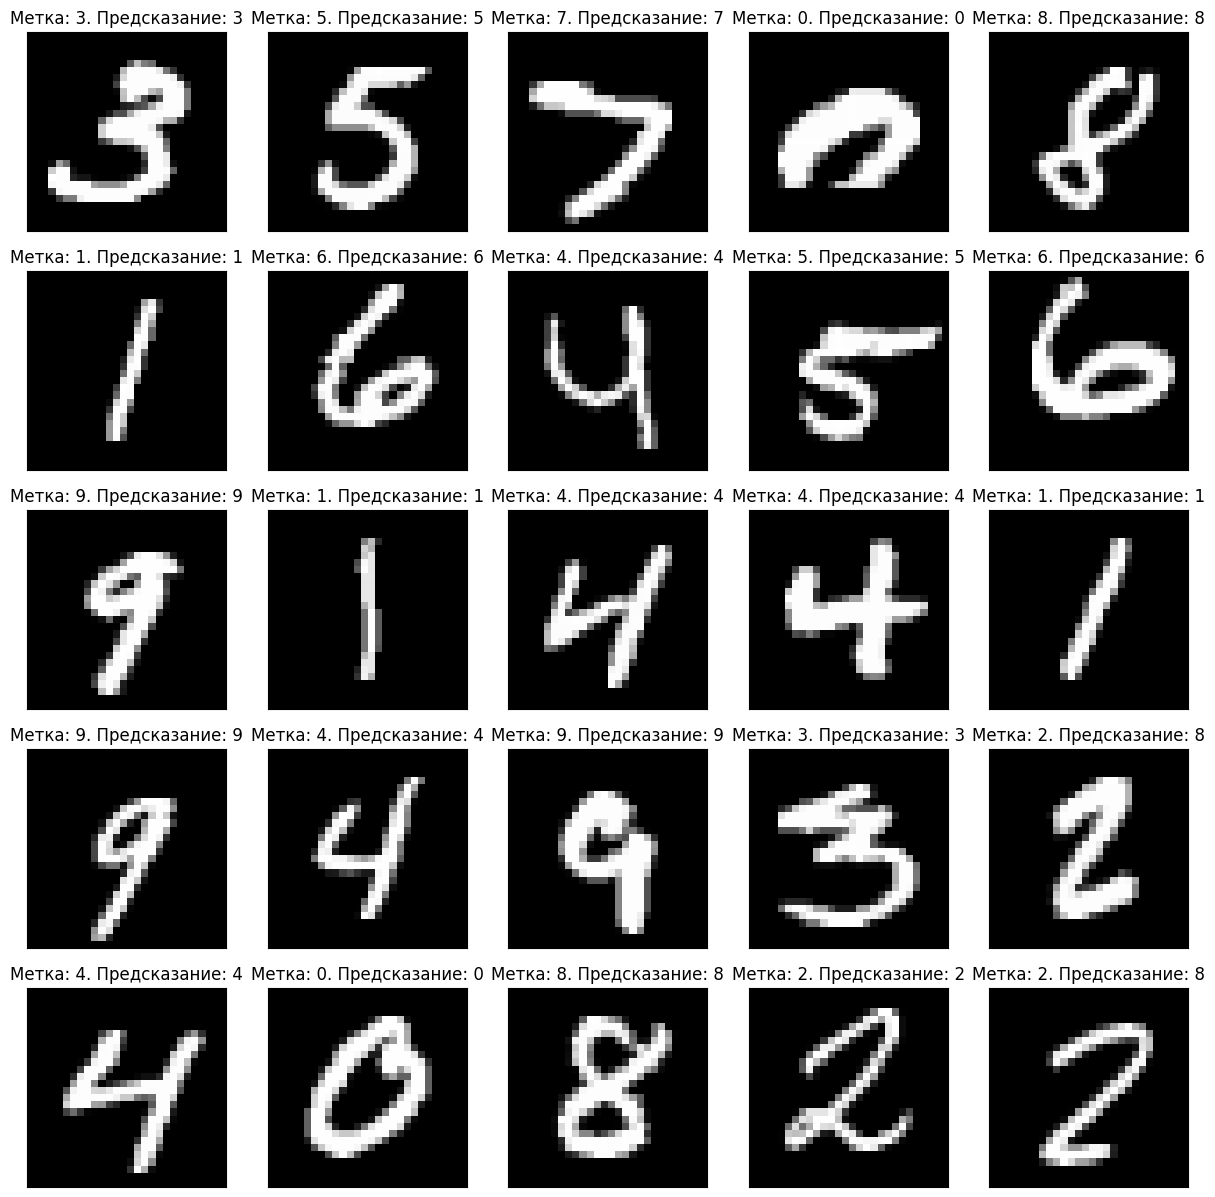

In [16]:
show_examples(X_test, y_test, model(X_test))

In [17]:
number_of_neurons = 16
f_activate = "relu" # "selu", "elu", "softmax", "sigmoid", "relu", ...
opt = "adam" # "adam", "nadam", "rmsprop", "sgd"...
epoch_ = 5
batch_size_ = 128

model = Sequential()

model.add(Flatten())
model.add(Dense(units=number_of_neurons, activation=f_activate))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=epoch_, batch_size=batch_size_)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
trainable_params = int(tf.keras.Model.count_params(model))

print(f" Количество обучаемых параметров в модели {trainable_params}")
print(f" Точность предсказаний на тестовой выборке {test_accuracy:.3f}")
print(f" Значение функции потерь на тестовой выборке {test_loss:.3f}")

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6978 - loss: 1.0361
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9148 - loss: 0.3065
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9267 - loss: 0.2592
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9340 - loss: 0.2352
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9378 - loss: 0.2214
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9252 - loss: 0.2530
 Количество обучаемых параметров в модели 12730
 Точность предсказаний на тестовой выборке 0.935
 Значение функции потерь на тестовой выборке 0.224


Переходим к свёрточным

In [18]:
X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))
input_size = X_train[0].shape
print(f" Теперь размер первого изображения {input_size}")
print(f" Ширина {input_size[0]}, Длина {input_size[1]}, Число каналов (цветов) {input_size[2]}")

 Теперь размер первого изображения (28, 28, 1)
 Ширина 28, Длина 28, Число каналов (цветов) 1


In [19]:
from keras.layers import Conv2D

In [20]:
conv_model = Sequential()

conv_model.add(Conv2D(32, (3, 3), activation="relu"))
conv_model.add(Conv2D(64, (3, 3), activation="relu"))
conv_model.add(Flatten())
conv_model.add(Dense(10, activation='softmax'))

In [21]:
conv_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
conv_model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8926 - loss: 0.3511
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9840 - loss: 0.0546
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9885 - loss: 0.0362
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9928 - loss: 0.0238
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9947 - loss: 0.0177


In [23]:
conv_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │         368,650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,162,400 (4.43 MB)

 Trainable params: 387,466 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 774,934 (2.96 MB)

Проверим качество работы модели на тестовых данных. Выводятся значение функции потерь и точность.

In [24]:
test_loss, test_accuracy = conv_model.evaluate(X_test, y_test)
trainable_params = int(tf.keras.Model.count_params(conv_model))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9841 - loss: 0.0543


In [25]:
print(f" Количество обучаемых параметров в модели {trainable_params}")
print(f" Точность предсказаний на тестовой выборке {test_accuracy:.3f}")
print(f" Значение функции потерь на тестовой выборке {test_loss:.3f}")

 Количество обучаемых параметров в модели 387466
 Точность предсказаний на тестовой выборке 0.988
 Значение функции потерь на тестовой выборке 0.042


In [27]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

number_of_neurons_1 = 32
number_of_filters = 64
alfa_ = 0.1
f_active = "relu" # "selu", "elu", "softmax", "sigmoid", "relu", ...
opt = "adam" # "adam", "nadam", "rmsprop", "sgd"...
epoch_ = 5
batch_size_ = 128

model = Sequential()

model.add(Conv2D(number_of_neurons_1, (3, 3),
                 activation=f_active))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(alfa_))
model.add(Conv2D(number_of_filters, (3, 3),
                 activation=f_active))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(alfa_))
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epoch_, batch_size=batch_size_)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
trainable_params = int(tf.keras.Model.count_params(model))

print(f" Количество обучаемых параметров в модели {trainable_params}")
print(f" Точность предсказаний на тестовой выборке {test_accuracy:.3f}")
print(f" Значение функции потерь на тестовой выборке {test_loss:.3f}")

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8246 - loss: 0.6358
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0863
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9802 - loss: 0.0642
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9851 - loss: 0.0483
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9863 - loss: 0.0444
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0433
 Количество обучаемых параметров в модели 34826
 Точность предсказаний на тестовой выборке 0.988
 Значение функции потерь на тестовой выборке 0.036


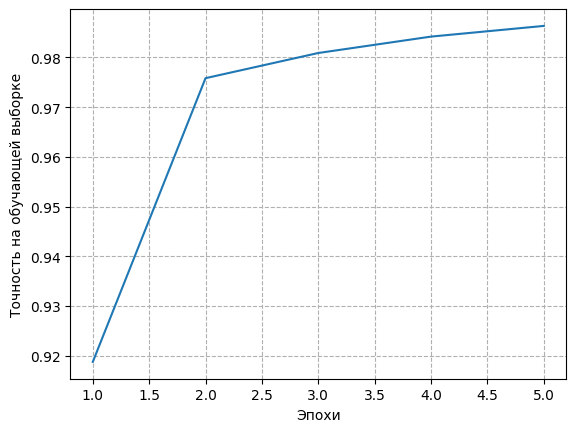

In [28]:
plt.plot(list(range(1, epoch_+1)), history.history['accuracy'])
plt.xlabel("Эпохи")
plt.ylabel("Точность на обучающей выборке")
plt.grid(linestyle="--")
plt.show()